<a href="https://colab.research.google.com/github/NoPParkGGame/MyFirstMachineLearning/blob/main/LinearR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# 농어의 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

# 농어의 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [3]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [5]:
print(knr.predict([[50]]))

[1033.33333333]


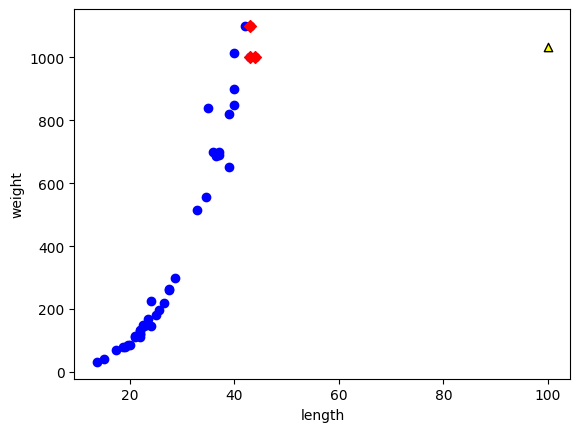

1033.3333333333333


In [6]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target, c = 'blue')
plt.scatter(train_input[indexes], train_target[indexes], marker='D', c='red')
plt.scatter(100, knr.predict([[150]]), marker='^', c='yellow', edgecolors='black')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(np.mean(train_target[indexes]))


In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [8]:
# y = ax + b 일 때, a = coefficient (coef_) , b = intercept_

print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


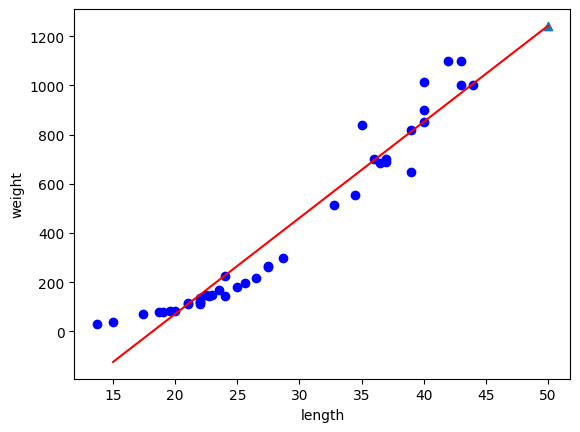

[1241.83860323]


In [9]:
plt.scatter(train_input, train_target, c = 'blue')

plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_], c='red')
plt.scatter(50, lr.predict([[50]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.predict([[50]]))


In [10]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
# 뭔가 이상한데!?!?!?!
# 농어 무게가 0 이하로 떨어지는 경우가 생김 -> 일차방정식, 즉 직선만으로는 제대로 찾을 수가 없음 -> 다항회귀 이용


0.939846333997604
0.8247503123313558


In [11]:
# y = ax^2 + bx + c 를 이용, x = 농어의 길이, y = 농어의 무게

train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly[:5])
print(train_poly.shape)
print(test_poly[:5])
print(test_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
(42, 2)
[[ 70.56   8.4 ]
 [324.    18.  ]
 [756.25  27.5 ]
 [453.69  21.3 ]
 [506.25  22.5 ]]
(14, 2)


In [12]:
lr.fit(train_poly, train_target)

lr.predict([[50**2, 50]])

array([1573.98423528])

In [13]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


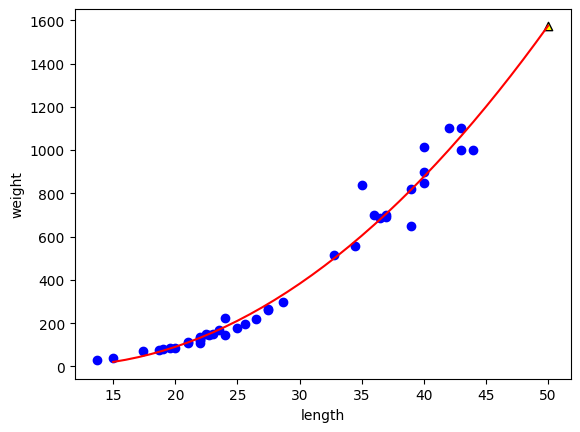

In [14]:
point = np.arange(15,51)

plt.scatter(train_input, train_target, c = 'blue')

plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_, c = 'red')

plt.scatter(50, lr.predict([[50**2, 50]]), c= 'yellow', edgecolors='black', marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


In [16]:
# 그래도 아직 과소적합 문제가 남아있음....